<a href="https://colab.research.google.com/github/ryanazmi/learn-git/blob/master/Supervised_Learning_II_Decision_Tree%2C_Ensamble_Learning_dan_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 4:
 Supervised Learning II: Decision Tree, Ensamble Learning dan
 Random Forests


 1 Decision Tree
 Decision Tree (DT) merupakanalgoritmaMachineLearning(ML)yangdapatdigunakanuntukklasi
f
 ikasi maupunregresi,danbahkanbisadigunakanpadamasalah-masalahdenganmultioutput. DT
 merupakan algoritma yang cukup powerful mampu melakukan fitting untuk dataset yang cukup
 kompleks. DT juga merupakan bagian fundamental dari Random Forrest, yang merupakan salah
 satu algoritma ML tersedia dan cukup powerful.
 Sebagai ilustrasi dari DT, contoh pada Gambar 4.1 adalah penggunaan DT untuk melakukan kon
struksi klasifikasi jenis binatang yang mungkin anda temui ketika sedang berjalan-jalan ke hutan.
 Pemisahan secara biner membuat algoritma DT sangat efisien. Pada DT yang dikonstruksi den
gan baik, setiap pertanyaan akan mengurangi pilihan kurang lebih setengahnya, sehingga akan
 sangat cepat mengurangi kemungkinan-kemungkinan pilihan meskipun jumlah class yang sangat
 besar. Trick-nya tentunya adalah untuk memberikan pertanyaan yang paling tepat pada setiap
 langkah. Pada implementasi machine learning dari DT, pertanyaan-pertanyaan tersebut pada se
tiap node membagi data ke dalam dua grup menggunakan sebuah harga cutoff pada salah satu
 features yang ada

![1.PNG](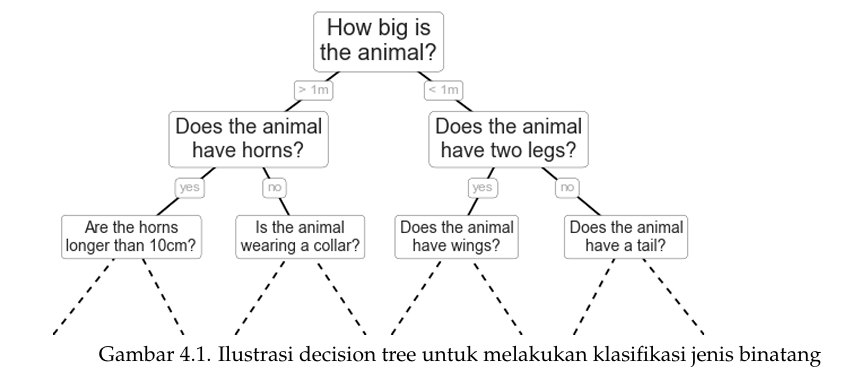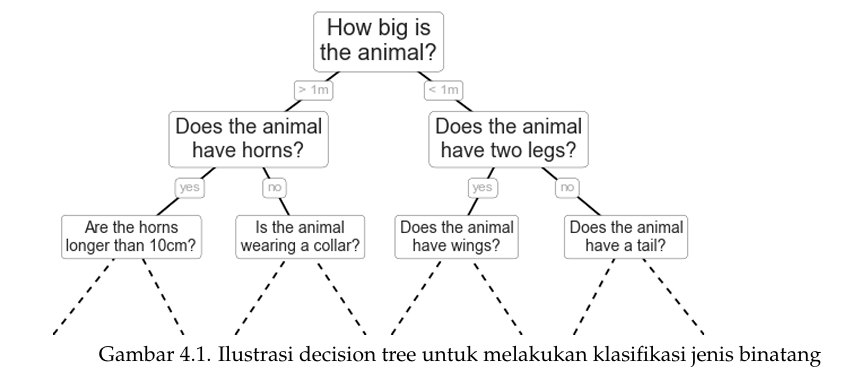)

Untuk memvisualisasikan DT, kita akan membuat sebuat contoh DT dan melihatnya bagaimana
 melakukan prediksi. Kode Python berikut melakukan training dari DecionTreeClassifier pada
 dataset iris

In [5]:
# Load Data Set Iris
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # Petal length and petal width
y = iris.target

X


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
# Training classifier
